# High Dimensional Probability and Concentration of Measure

Machine Learning Fundamentals for Economists

Jesse Perla (University of British Columbia)

# Overview

## Summary

-   High-dimensional spaces exhibit counterintuitive geometric and
    probabilistic properties
-   Key phenomena:
    -   The **curse of dimensionality**: most volume is in corners,
        uniform sampling fails
    -   **Near-orthogonality**: random vectors are almost perpendicular
    -   **Concentration of measure**: functions of many variables are
        “essentially constant”
    -   **Johnson-Lindenstrauss**: random projections preserve distances
-   These concepts are foundational for understanding why ML methods
    work
-   Applications to economic models covered in [subsequent
    lecture](solving_equilibrium_problems.qmd)

## References

-   Primary reference: @vershynin2018high
-   Concentration inequalities: @boucheron2013concentration
-   Classic reference: @ledoux2001concentration

# The Curse of Dimensionality

## Hypercubes Are All Corners

-   Consider the volume of a hypersphere inscribed in a unit hypercube
    $[-1/2, 1/2]^N$
-   The hypersphere touches all faces with radius $r = 1/2$
-   Volume formula:

$$
V_N(r) = \frac{\pi^{N/2}}{\Gamma(N/2 + 1)} r^N
$$

-   For unit hypercube ($r = 1/2$): $V_1 = 1$,
    $V_2 = \pi/4 \approx 0.79$, $V_3 \approx 0.52$
-   But: $V_{10} \approx 0.002$, $V_{50} \approx 1.5 \times 10^{-28}$

------------------------------------------------------------------------

<figure>
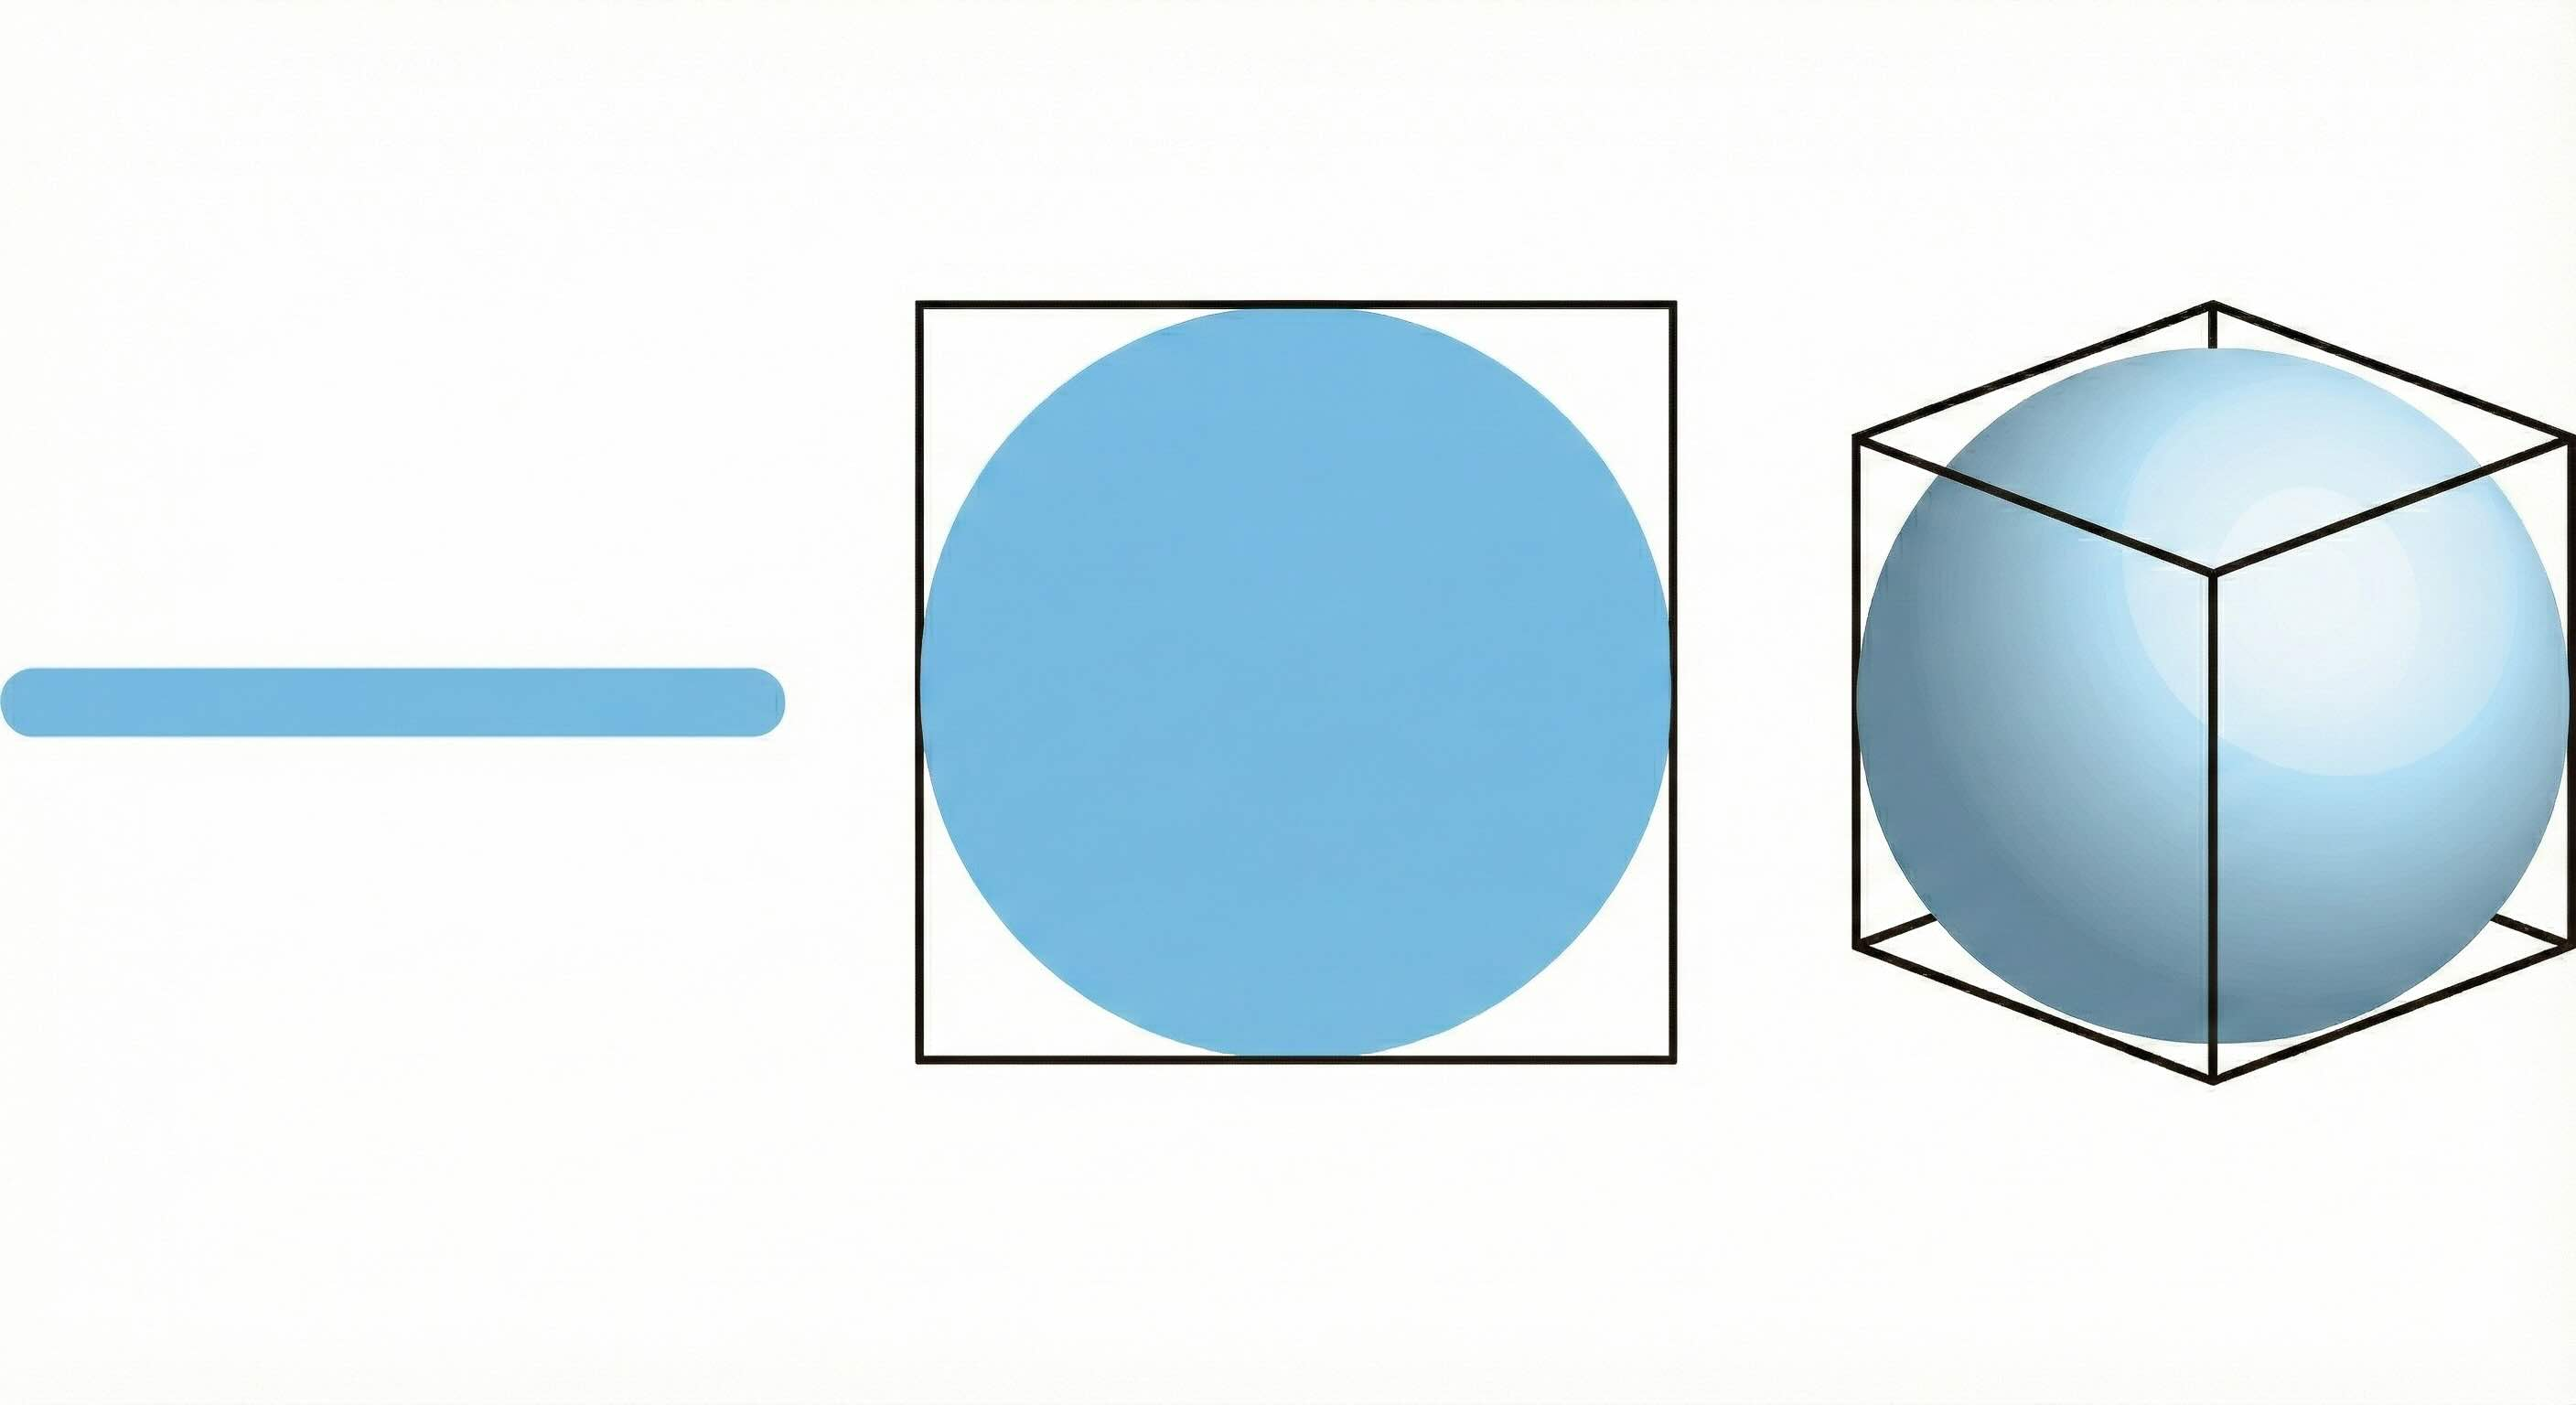
<figcaption aria-hidden="true">Hypersphere inscribed in hypercube for
<span class="math inline"><em>N</em> = 1, 2, 3</span></figcaption>
</figure>

-   The hypersphere (the “interior”) becomes vanishingly small
-   Almost all volume is concentrated in the corners of the hypercube

## A High-Dimensional Space is a Lonely Place

*“A High-Dimensional Space is a Lonely Place”* (Bernhard Schölkopf)

-   **Sampling problem**: If $M$ points are distributed uniformly in
    $[0,1]^N$, then as $N \to \infty$:
    -   The largest ball around any point will (almost surely) contain
        no other points
    -   Even $M$ exponential in $N$ may not suffice for coverage
-   **Grid problem**: Uniform grids waste exponentially many points in
    corners
    -   To cover $[0,1]^N$ with spacing $h$, need $(1/h)^N$ points
    -   Most points are far from any “typical” location

## Statistical Learning: A Way Forward

-   We cannot uniformly bound errors
    $\sup_{x \in {\mathcal{X}}} |f(x) - \hat{f}(x)|$ without exponential
    cost
-   **Statistical learning perspective**: Find $f$ accurate on regions
    weighted by a distribution $\mu^*$
    -   Risk minimization:
        $\min_{f} \mathbb{E}_{x \sim \mu^*}[\ell(f, x)]$
    -   Gives up uniform bounds for distributional accuracy
-   Why does this help?
    -   Probability distributions in high dimensions concentrate in
        specific regions
    -   ML succeeds on images ($N \sim 10^6$ pixels), text, video -
        there must be structure!
-   Next: understand the probabilistic structure of high-dimensional
    spaces

# Near-Orthogonality of Random Vectors

## Random Vectors Are Almost Orthogonal

-   In low dimensions, random directions vary widely in their angles
-   In high dimensions, random vectors are almost always nearly
    perpendicular

<figure>
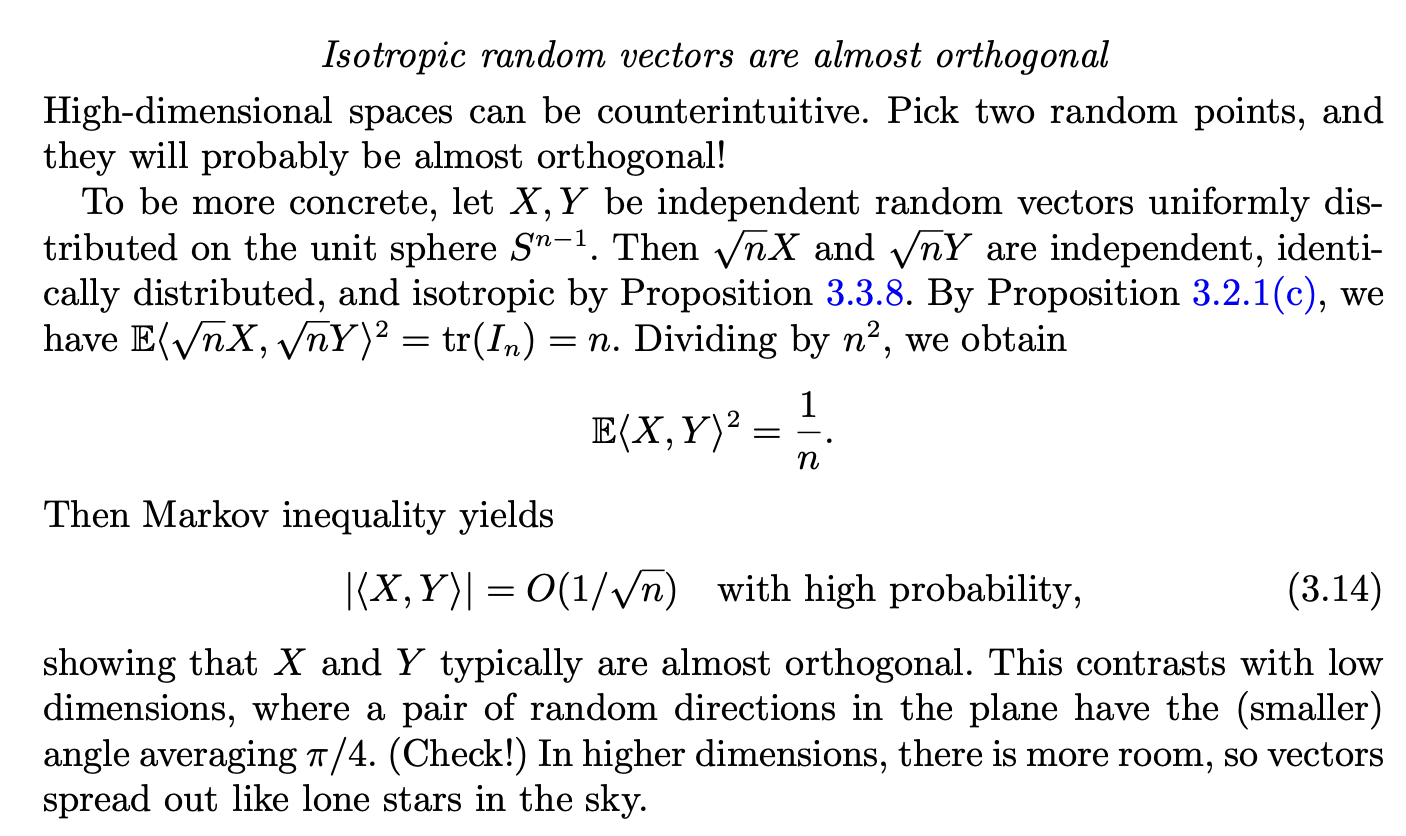
<figcaption aria-hidden="true">From <span class="citation"
data-cites="vershynin2018high">@vershynin2018high</span>: random vectors
concentrate around angle <span
class="math inline"><em>π</em>/2</span></figcaption>
</figure>

## Formal Statement

-   Let $X, Y$ be independent random vectors uniformly distributed on
    the unit sphere $S^{N-1}$
-   Then: $\mathbb{E}[\langle X, Y \rangle^2] = \frac{1}{N}$
-   By Markov inequality, with high probability:

$$
|\langle X, Y \rangle| = O(1/\sqrt{N})
$$

-   **Implications**:
    -   All pairwise angles concentrate around $\pi/2$
    -   Distances between random points become more uniform
    -   Hard to distinguish “near” from “far” using Euclidean balls

# Concentration of Measure

## The Phenomenon

*“A random variable that depends in a Lipschitz way on many independent
variables (but not too much on any of them) is essentially constant.”*
(@ledoux2001concentration)

-   **Concentration of measure**: Functions of high-dimensional random
    variables have small variance
-   Not just asymptotic - **non-asymptotic bounds** that improve with
    dimension
-   Key insight: If no single coordinate dominates, the function
    “averages out”

## Example: Norm of Isotropic Gaussian

-   Let $X \sim \mathcal{N}(0_N, I_N)$ be an $N$-dimensional standard
    Gaussian
-   Consider $f(X) = \|X\|_2 / \sqrt{N}$
-   Concentration bound:

$$
{\mathbb{P}_{}\left( {|f(X) - 1| \geq \epsilon} \right)} \leq \exp(-c \epsilon^2 N)
$$

for some constant $c > 0$ independent of $N$.

-   The ratio $\|X\|_2 / \sqrt{N}$ becomes increasingly predictable as
    $N$ grows
-   Convergence is **exponentially fast** in $N$

------------------------------------------------------------------------

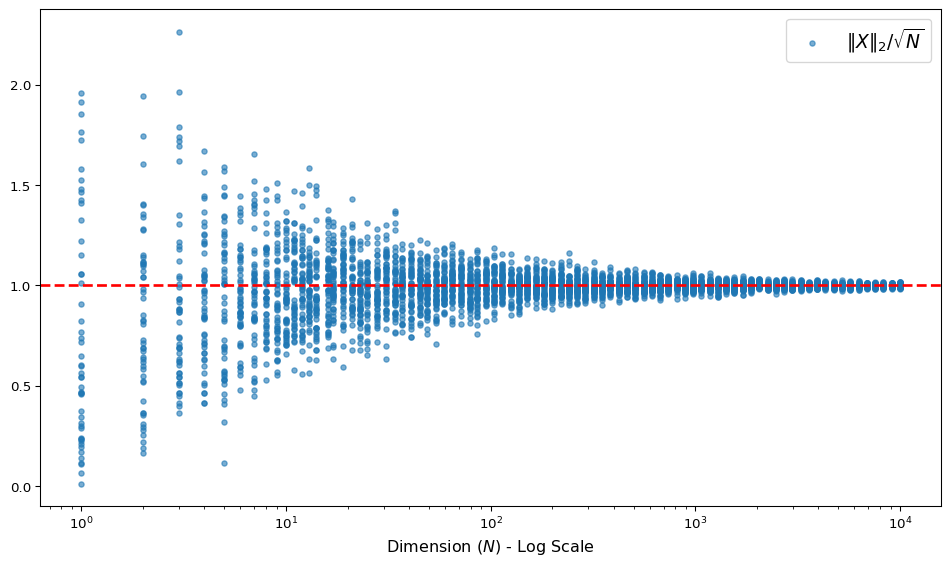

-   50 draws of $X \sim \mathcal{N}(0_N, I_N)$ for each dimension $N$
-   As $N$ increases, all samples concentrate tightly around 1

## The Soap Bubble Effect

<figure>
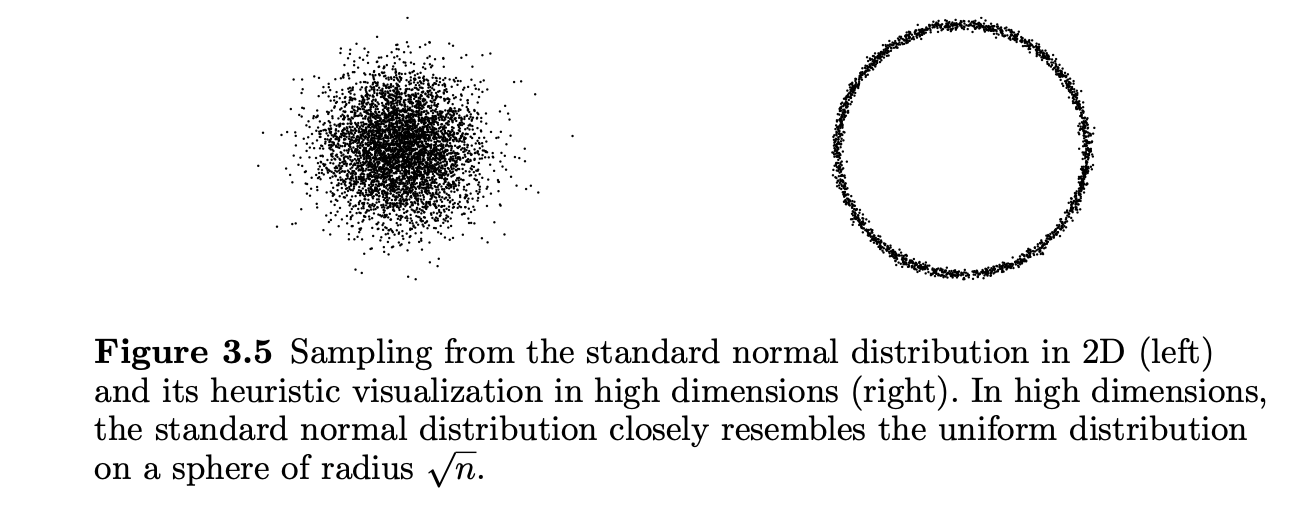
<figcaption aria-hidden="true">From <span class="citation"
data-cites="vershynin2018high">@vershynin2018high</span>: 2D Gaussian
samples vs. high-dimensional projection</figcaption>
</figure>

-   2D Gaussians are distributed around the origin with an intuitive
    “peak”
-   High-dimensional Gaussians are distributed roughly uniformly on a
    **spherical shell** of radius $\sqrt{N}$
-   Points are nowhere near the mode/mean/median (i.e., $X = 0_N$)
-   This is the “soap bubble” phenomenon: the distribution lives on a
    thin shell

## Lipschitz Concentration (Informal)

> **Definition: Lipschitz Function**
>
> A function $f: {\mathbb{R}}^N \to {\mathbb{R}}$ is **$L$-Lipschitz**
> if for all $x, y \in {\mathbb{R}}^N$:
>
> $$
> |f(x) - f(y)| \leq L \|x - y\|_2
> $$

-   Lipschitz functions cannot change too fast
-   For $f(x) = \|x\|_2$, we have $L = 1$
-   Key insight: Lipschitz functions of Gaussians concentrate around
    their mean

## Gaussian Concentration Inequality

> **Proposition: Concentration for Lipschitz Functions of Gaussians**
>
> Let $X \sim \mathcal{N}(0_N, I_N)$ and let
> $f: {\mathbb{R}}^N \to {\mathbb{R}}$ be $L$-Lipschitz. Then:
>
> $$
> {\mathbb{P}_{}\left( {|f(X) - \mathbb{E}[f(X)]| \geq t} \right)} \leq 2\exp\left(-\frac{t^2}{2L^2}\right)
> $$

-   The bound is **independent of dimension** $N$!
-   For normalized functions (gradient $O(1/\sqrt{N})$), concentration
    improves with $N$
-   Many extensions: bounded differences, sub-Gaussian tails, etc.
    (@boucheron2013concentration)

# Concentration is a Double-Edged Sword

## Shifted Mean: Small Changes, Big Separation

-   Consider two distributions: $\mathcal{N}(0_N, I_N)$
    vs. $\mathcal{N}(\epsilon \cdot \mathbf{1}_N, I_N)$
-   The Euclidean distance between means is $\epsilon \sqrt{N}$
-   As $N$ grows, distributions separate completely despite small
    per-coordinate shift

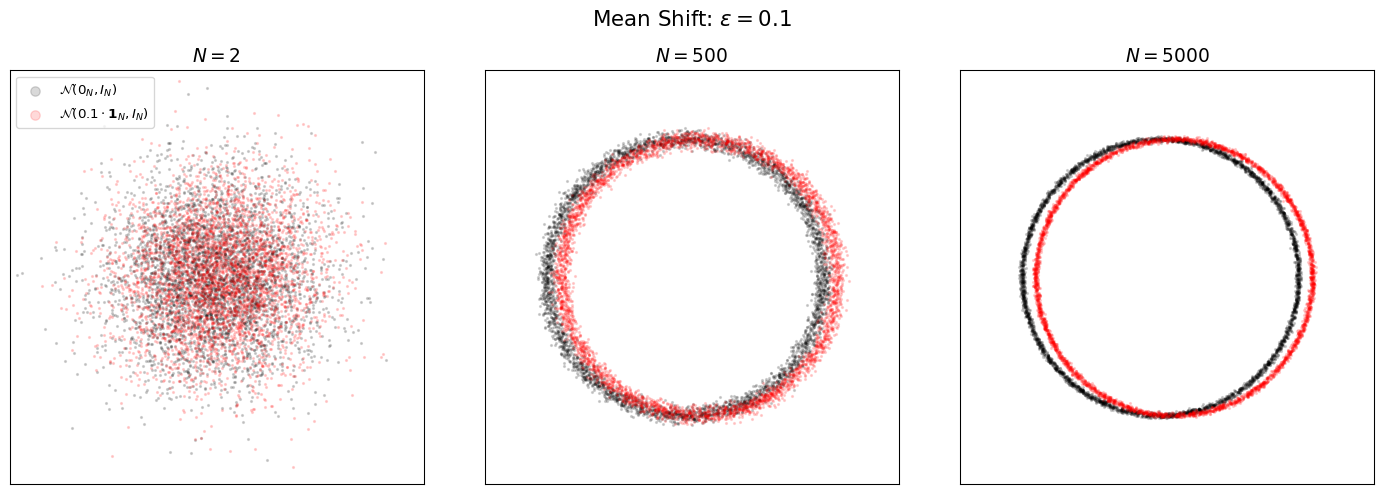

## Variance Shift is Even More Dangerous

-   Consider: $\mathcal{N}(0_N, I_N)$
    vs. $\mathcal{N}(0_N, (1 + \epsilon) I_N)$
-   A tiny 5% variance increase causes complete separation in high
    dimensions

/tmp/ipykernel_4611/2198770344.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()

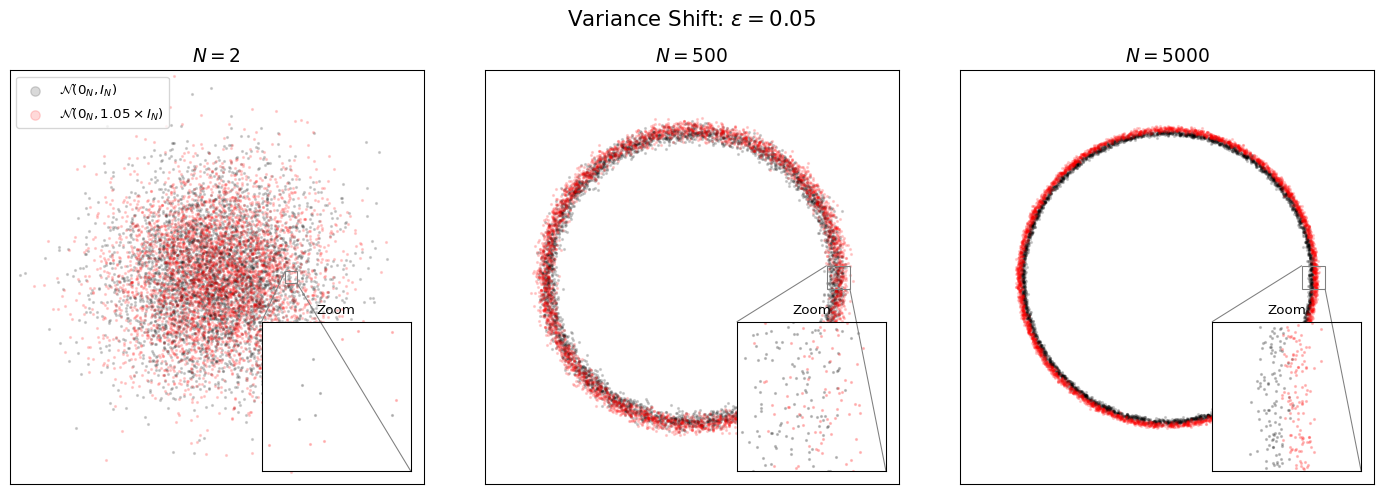

## Marginals Are Deceptive

-   The marginal distribution of any single coordinate is **identical**
    for both distributions
-   Yet the joint distributions are completely separated!

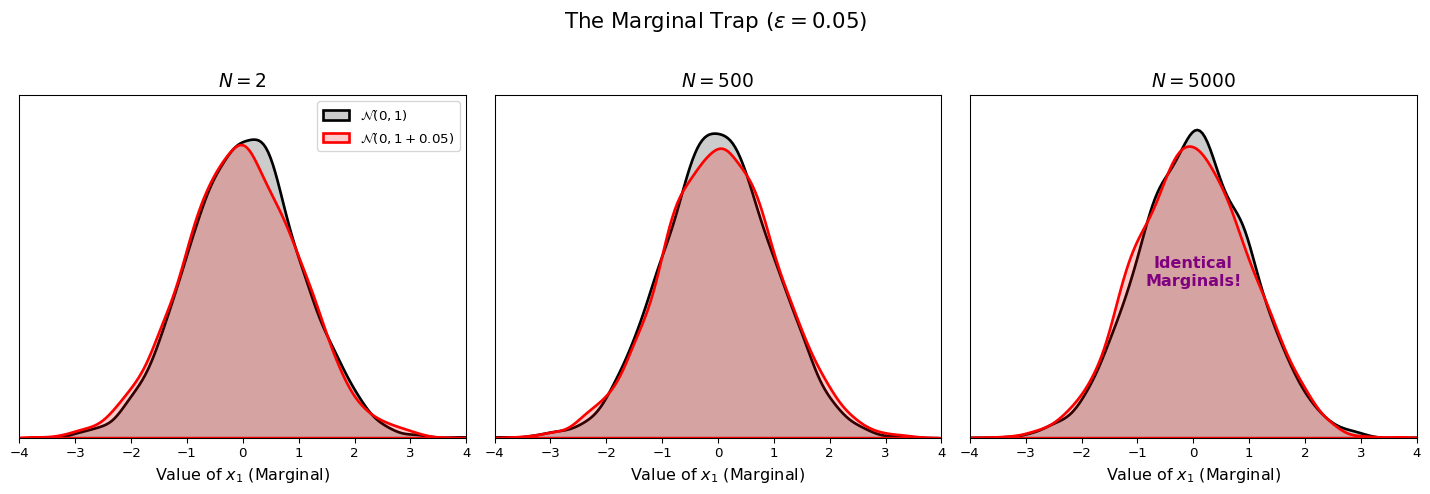

## Key Insight: Double-Edged Sword

-   **Within a distribution**: Concentration is helpful
    -   Functions become predictable
    -   Few samples may suffice for accurate estimation
-   **Across distributions**: Concentration is dangerous
    -   Small changes in distribution parameters cause complete
        separation
    -   A model trained on one distribution may fail entirely on a
        slightly different one
-   **Implication for learning**:
    -   Must ensure training distribution ${\mathcal{D}}\sim \mu^*$
        matches test distribution
    -   “Out of distribution” generalization is fundamentally hard

# Johnson-Lindenstrauss Lemma

## Random Projections Preserve Distances

-   **Surprising fact**: We can project from ${\mathbb{R}}^N$ to
    ${\mathbb{R}}^k$ with $k \ll N$ while approximately preserving all
    pairwise distances
-   The required dimension $k$ depends on the **number of points**, not
    the ambient dimension $N$

> **Proposition: Johnson-Lindenstrauss Lemma**
>
> For any $\epsilon \in (0, 1)$ and any set of $M$ points in
> ${\mathbb{R}}^N$, there exists a linear map
> $A: {\mathbb{R}}^N \to {\mathbb{R}}^k$ with
>
> $$
> k = O\left(\frac{\log M}{\epsilon^2}\right)
> $$
>
> such that for all pairs of points $x_i, x_j$:
>
> $$
> (1 - \epsilon) \|x_i - x_j\|_2^2 \leq \|A x_i - A x_j\|_2^2 \leq (1 + \epsilon) \|x_i - x_j\|_2^2
> $$

## Construction and Implications

-   **Construction**: Random Gaussian matrices (or even simpler random
    matrices) work!
    -   Each entry of $A$ drawn i.i.d. from $\mathcal{N}(0, 1/k)$
    -   Projection is linear: $z = A x$
-   **Implications**:
    -   1 million points in ${\mathbb{R}}^{10000}$ can be embedded in
        ${\mathbb{R}}^{O(\log 10^6)} \approx {\mathbb{R}}^{40}$
        preserving distances
    -   Explains why dimensionality reduction works
    -   Random features/projections are theoretically grounded

## Connection to Machine Learning

-   **Why representations work**: If distances are preserved in low
    dimensions, learning in the reduced space is valid
-   **Random features**: JL provides theoretical foundation for random
    projection methods
-   **Neural networks**: Learned projections can be even more efficient
    than random ones
    -   But JL shows random projections are already surprisingly good
-   **Kernel methods**: Random Fourier features approximate kernel
    functions via JL-type arguments

# Preview: Applications to Economic Models

## Why This Matters for Economics

-   Heterogeneous agent models have high-dimensional state spaces
    -   $N$ agents, each with individual state $\implies$ state space
        ${\mathbb{R}}^N$
-   **Curse of dimensionality** seems to doom us
-   But concentration offers hope:
    -   If states are exchangeable (e.g., agents are symmetric),
        functions concentrate
    -   Dynamics may keep trajectories in low-dimensional regions
    -   Monte Carlo with single draw may suffice for idiosyncratic
        shocks
-   **Next lecture**: Applying these ideas to solve equilibrium problems
    -   Permutation invariance and symmetry
    -   Statistical learning formulation
    -   Why Krusell-Smith style methods work

## References